In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []
 
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
 
# Create counters
record_count = 1
set_count = 1
 
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
 
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="+city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
 
    # Add 1 to the record count
    record_count += 1
 
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
 
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
 
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebrija
Processing Record 2 of Set 1 | tiznit
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | uryupinsk
Processing Record 7 of Set 1 | rawson
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | mackay
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | taltal
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | vilhena
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | severo-kurilsk
Proces

In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [14]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebrija,36.9208,-6.0753,14.33,100,20,1.03,ES,1667882404
1,tiznit,29.5833,-9.5000,20.06,22,98,1.81,MA,1667882464
2,mount gambier,-37.8333,140.7667,26.05,43,0,0.44,AU,1667882466
3,tuktoyaktuk,69.4541,-133.0374,-18.00,85,0,4.12,CA,1667882466
4,uryupinsk,50.8047,42.0138,2.01,81,75,2.29,RU,1667882466


In [15]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        556 non-null    object 
 1   Lat         556 non-null    float64
 2   Lng         556 non-null    float64
 3   Max Temp    556 non-null    float64
 4   Humidity    556 non-null    int64  
 5   Cloudiness  556 non-null    int64  
 6   Wind Speed  556 non-null    float64
 7   Country     556 non-null    object 
 8   Date        556 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.2+ KB


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebrija,36.9208,-6.0753,14.33,100,20,1.03,ES,1667882404
1,tiznit,29.5833,-9.5000,20.06,22,98,1.81,MA,1667882464
2,mount gambier,-37.8333,140.7667,26.05,43,0,0.44,AU,1667882466
3,tuktoyaktuk,69.4541,-133.0374,-18.00,85,0,4.12,CA,1667882466
4,uryupinsk,50.8047,42.0138,2.01,81,75,2.29,RU,1667882466


In [18]:
lat_temp = city_data_df
lat_temp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebrija,36.9208,-6.0753,14.33,100,20,1.03,ES,1667882404
1,tiznit,29.5833,-9.5000,20.06,22,98,1.81,MA,1667882464
2,mount gambier,-37.8333,140.7667,26.05,43,0,0.44,AU,1667882466
3,tuktoyaktuk,69.4541,-133.0374,-18.00,85,0,4.12,CA,1667882466
4,uryupinsk,50.8047,42.0138,2.01,81,75,2.29,RU,1667882466
...,...,...,...,...,...,...,...,...,...
551,san joaquin,37.9333,-121.3011,12.14,81,0,4.12,US,1667882724
552,vung tau,10.3460,107.0843,27.56,75,100,1.57,VN,1667882725
553,laguna,38.4210,-121.4238,10.08,83,40,4.12,US,1667882725


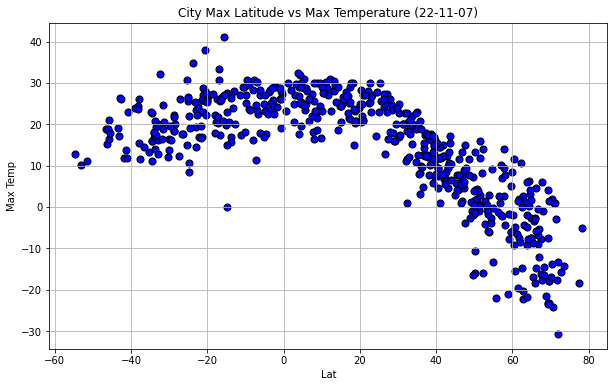

In [19]:
# Build scatter plot for latitude vs. temperature

#Markersize
sizes = [50]

lat_temp.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(10,6), marker = "o", sizes = sizes, c = "blue", edgecolors="black") 

plt.title(f"City Max Latitude vs Max Temperature ({datetime.now():%y-%m-%d})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

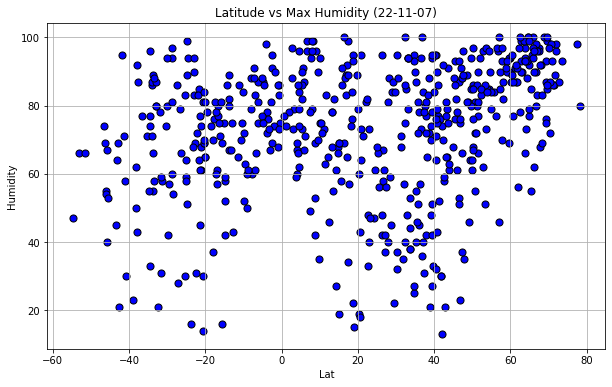

In [20]:
# Build scatter plot for latitude vs. Humidity

#Markersize
sizes = [50]

lat_temp.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(10,6), marker = "o", sizes=sizes, c="blue", edgecolors='black')

plt.title(f"Latitude vs Max Humidity ({datetime.now():%y-%m-%d})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

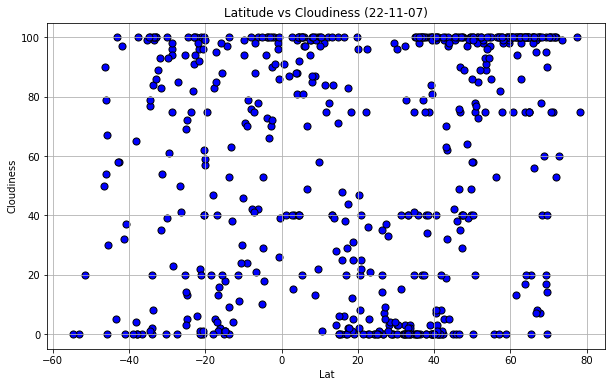

In [21]:
# Build scatter plot for latitude vs. Cloudiness

#Markersize
sizes = [50]

lat_temp.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(10,6), marker = "o", sizes =sizes, c="blue", edgecolors='black')

plt.title(f"Latitude vs Cloudiness ({datetime.now():%y-%m-%d})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

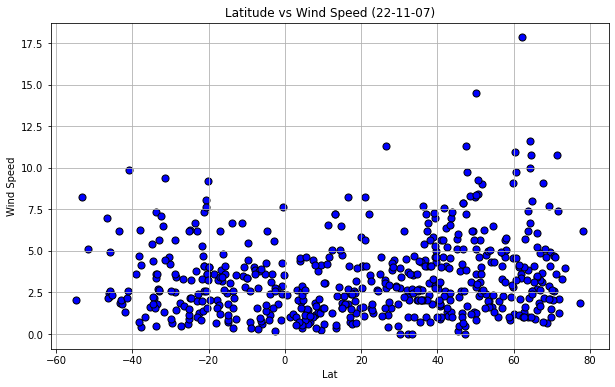

In [22]:
# Build scatter plot for latitude vs. Wind Speed

#Markersize
sizes = [50]

lat_temp.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(10,6), marker = "o", sizes=sizes, c="blue", edgecolors='black')

plt.title(f"Latitude vs Wind Speed ({datetime.now():%y-%m-%d})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [23]:
north_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebrija,36.9208,-6.0753,14.33,100,20,1.03,ES,1667882404
1,tiznit,29.5833,-9.5000,20.06,22,98,1.81,MA,1667882464
3,tuktoyaktuk,69.4541,-133.0374,-18.00,85,0,4.12,CA,1667882466
4,uryupinsk,50.8047,42.0138,2.01,81,75,2.29,RU,1667882466
10,sorland,67.6670,12.6934,5.92,68,7,9.11,NO,1667882470


In [24]:
x_values_north_lat = north_hemi_df['Lat']
y_values_north_temp = north_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_lat, y_values_north_temp)

# Get regression values
regress_values_north_temp = x_values_north_lat * slope + intercept
print(regress_values_north_temp)

City_ID
0      11.672542
1      16.175298
3      -8.291957
4       3.152499
10     -7.195279
         ...    
550     5.188205
551    11.051207
552    27.980526
553    10.751924
555    11.415662
Name: Lat, Length: 384, dtype: float64


In [25]:
# Create line equation string
line_eq_north_temp = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_north_temp)

y = -0.61x +34.33


# Northern Hemisphere: Temperature vs. Latitude

The r-value is: 0.7709917193072465


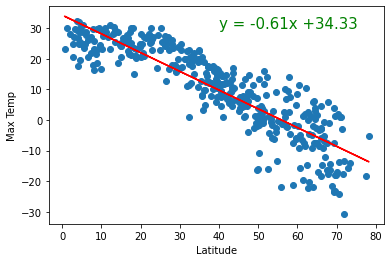

In [26]:
# Create Plot
plt.scatter(x_values_north_lat,y_values_north_temp)
plt.plot(x_values_north_lat,regress_values_north_temp,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_north_temp,(40,30),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [27]:
south_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mount gambier,-37.8333,140.7667,26.05,43,0,0.44,AU,1667882466
5,rawson,-43.3002,-65.1023,17.15,64,100,1.85,AR,1667882467
6,puerto ayora,-0.7393,-90.3518,19.19,86,86,2.90,EC,1667882468
7,mackay,-21.1500,149.2000,28.71,61,0,7.33,AU,1667882468
8,namibe,-15.1961,12.1522,19.83,75,0,2.47,AO,1667882469


In [28]:
x_values_south_lat = south_hemi_df['Lat']
y_values_south_temp = south_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_lat, y_values_south_temp)

# Get regression values
regress_values_south_temp = x_values_south_lat * slope + intercept
print(regress_values_south_temp)

City_ID
2      18.529562
5      17.394082
6      26.234020
7      21.994699
8      23.231329
         ...    
543    19.837206
544    23.630344
546    23.313600
549    22.081248
554    22.963977
Name: Lat, Length: 172, dtype: float64


In [29]:
# Create line equation string
line_eq_south_temp = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_south_temp)

y = 0.21x +26.39


# Southern Hemisphere: Temperature vs. Latitude

The r-value is: 0.2036085728847318


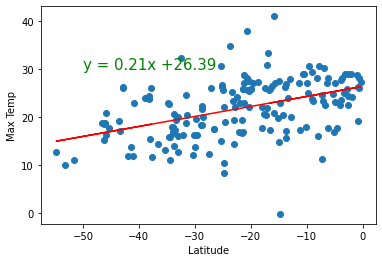

In [30]:
plt.scatter(x_values_south_lat,y_values_south_temp)
plt.plot(x_values_south_lat,regress_values_south_temp,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_south_temp,(-50,30),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [31]:
x_values_north_lat = north_hemi_df['Lat']
y_values_north_hum = north_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_lat, y_values_north_hum)

# Get regression values
regress_values_north_hum = x_values_north_lat * slope + intercept
print(regress_values_north_hum)

City_ID
0      73.708519
1      71.560709
3      83.231563
4      77.772570
10     82.708449
         ...    
550    76.801540
551    74.004895
552    65.929627
553    74.147653
555    73.831050
Name: Lat, Length: 384, dtype: float64


In [32]:
# Create line equation string
line_eq_north_hum = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_north_hum)

y = 0.29x +62.9


# Northern Hemisphere: Humidity vs. Latitude

The r-value is: 0.08344365138421075


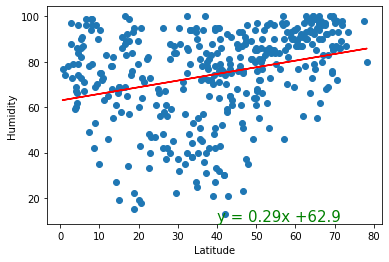

In [33]:
# Create Plot
plt.scatter(x_values_north_lat,y_values_north_hum)
plt.plot(x_values_north_lat,regress_values_north_hum,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_north_hum,(40,10),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [34]:
x_values_south_lat = south_hemi_df['Lat']
y_values_south_hum = south_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_lat, y_values_south_hum)

# Get regression values
regress_values_south_hum = x_values_south_lat * slope + intercept
print(regress_values_south_hum)

City_ID
2      62.760195
5      60.710200
6      76.669815
7      69.016149
8      71.248761
         ...    
543    65.121013
544    71.969141
546    71.397292
549    69.172405
554    70.766083
Name: Lat, Length: 172, dtype: float64


In [35]:
# Create line equation string
line_eq_south_hum = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_south_hum)

y = 0.37x +76.95


# Southern Hemisphere: Humidity vs. Latitude

The r-value is: 0.07182833167910818


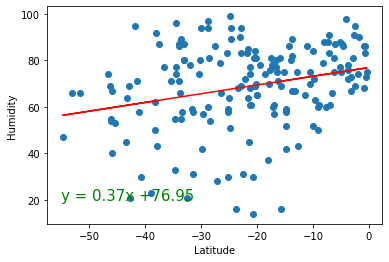

In [36]:
plt.scatter(x_values_south_lat,y_values_south_hum)
plt.plot(x_values_south_lat,regress_values_south_hum,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_south_hum,(-55,20),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [37]:
x_values_north_lat = north_hemi_df['Lat']
y_values_north_cloud = north_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_lat, y_values_north_cloud)

# Get regression values
regress_values_north_cloud = x_values_north_lat * slope + intercept
print(regress_values_north_cloud)

City_ID
0      57.838992
1      54.195671
3      73.992891
4      64.732824
10     73.105535
         ...    
550    63.085671
551    58.341733
552    44.643692
553    58.583892
555    58.046841
Name: Lat, Length: 384, dtype: float64


In [38]:
# Create line equation string
line_eq_north_cloud = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_north_cloud)

y = 0.5x +39.51


# Northern Hemisphere: Cloudiness vs. Latitude

The r-value is: 0.05970782460681809


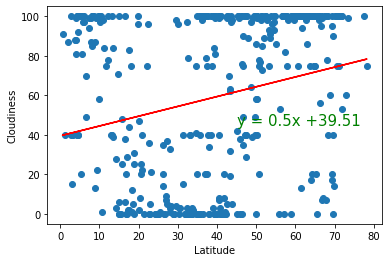

In [39]:
# Create Plot
plt.scatter(x_values_north_lat,y_values_north_cloud)
plt.plot(x_values_north_lat,regress_values_north_cloud,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_north_cloud,(45,45),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [40]:
x_values_south_lat = south_hemi_df['Lat']
y_values_south_cloud = south_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_lat, y_values_south_cloud)

# Get regression values
regress_values_south_cloud = x_values_south_lat * slope + intercept
print(regress_values_south_cloud)

City_ID
2      48.174171
5      45.866407
6      63.832807
7      55.216758
8      57.730101
         ...    
543    50.831842
544    58.541063
546    57.897309
549    55.392661
554    57.186730
Name: Lat, Length: 172, dtype: float64


In [41]:
# Create line equation string
line_eq_south_cloud = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_south_cloud)

y = 0.42x +64.14


# Southern Hemisphere: Cloudiness vs. Latitude

The r-value is: 0.021081087552760436


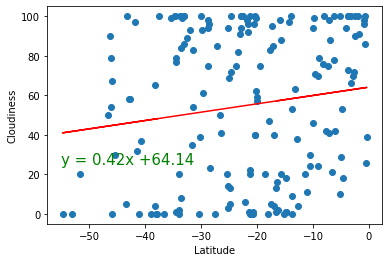

In [42]:
plt.scatter(x_values_south_lat,y_values_south_cloud)
plt.plot(x_values_south_lat,regress_values_south_cloud,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_south_cloud,(-55,25),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [43]:
x_values_north_lat = north_hemi_df['Lat']
y_values_north_wind = north_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_lat, y_values_north_wind)

# Get regression values
regress_values_north_wind = x_values_north_lat * slope + intercept
print(regress_values_north_wind)

City_ID
0      3.384516
1      3.154748
3      4.403271
4      3.819280
10     4.347309
         ...   
550    3.715401
551    3.416222
552    2.552348
553    3.431494
555    3.397625
Name: Lat, Length: 384, dtype: float64


In [44]:
# Create line equation string
line_eq_north_wind = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_north_wind)

y = 0.03x +2.23


# Northern Hemisphere: Wind Speed vs. Latitude

The r-value is: 0.06411700408842552


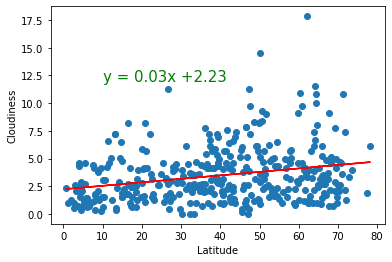

In [45]:
# Create Plot
plt.scatter(x_values_north_lat,y_values_north_wind)
plt.plot(x_values_north_lat,regress_values_north_wind,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_north_wind,(10,12),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [46]:
x_values_south_lat = south_hemi_df['Lat']
y_values_south_wind = south_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_lat, y_values_south_wind)

# Get regression values
regress_values_south_wind = x_values_south_lat * slope + intercept
print(regress_values_south_wind)

City_ID
2      3.507219
5      3.619012
6      2.748683
7      3.166062
8      3.044310
         ...   
543    3.378476
544    3.005026
546    3.036211
549    3.157541
554    3.070632
Name: Lat, Length: 172, dtype: float64


In [47]:
# Create line equation string
line_eq_south_wind = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_south_wind)

y = -0.02x +2.73


# Southern Hemisphere: Wind Speed vs. Latitude

The r-value is: 0.017351861200320437


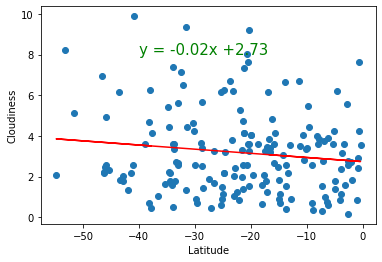

In [49]:
plt.scatter(x_values_south_lat,y_values_south_wind)
plt.plot(x_values_south_lat,regress_values_south_wind,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_south_wind,(-40,8),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()